# Employee Attrition Analysis-EDA

### Business Problem

Data Labs has been experiencing increased employee turnover.
High attrition leads to:

- Increased recruitment costs
- Loss of experienced talent
- Reduced productivity
- Low team morale

The HR department wants a data-driven analysis to understand:

- Why employee leave
- Which factors influence attrition
- What kind of employees are most at risk

This notebook performs an in-depth EDA on the HR datasets to uncover actionable insights.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [5]:
#Load Data
df =pd.read_csv(r"C:\Users\Jones Mbela\Desktop\RENNY\AI AND ML\Employee attrition\data\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
# Basic Overview
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns)

Dataset Shape: (1470, 35)

Columns: Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [7]:
#Data types and Missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Observations
- The dataset contains both numerical and categorical variables
- There are no **no missing values**, which simplifies preprocessing
- Target variable is **Attrition**
- Total records :1470 employees

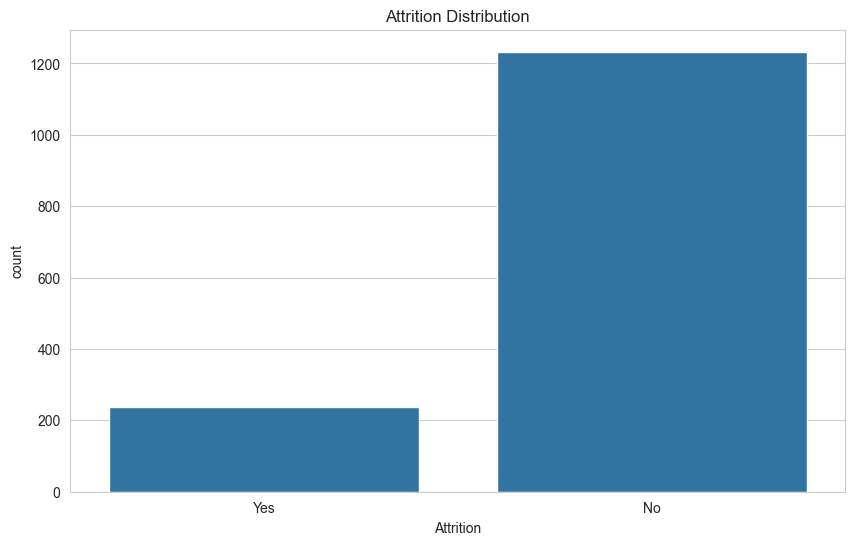

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

In [8]:
#Attrition Distribution
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Distribution')
plt.show()

df['Attrition'].value_counts(normalize=True) * 100

### Key Insight
- Around **16% od employees have left the company**
- Dataset is slightly imbalanced 
- Attrition is a minority class problem


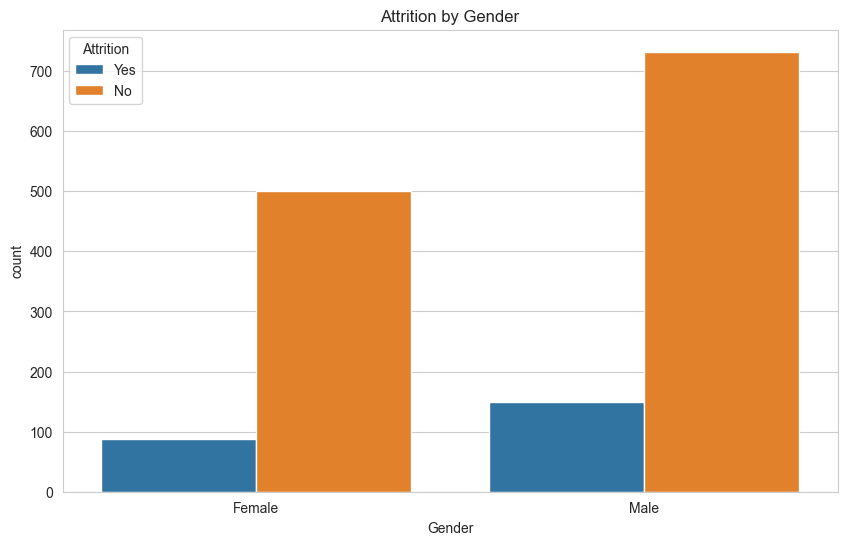

In [9]:
#Demographic Analysis
#Attrition by Gender

sns.countplot(x='Gender',hue='Attrition',data=df)
plt.title('Attrition by Gender')
plt.show()

### Key Insight
- Males have a higher turnover than females
- Slight imbalaced dataset


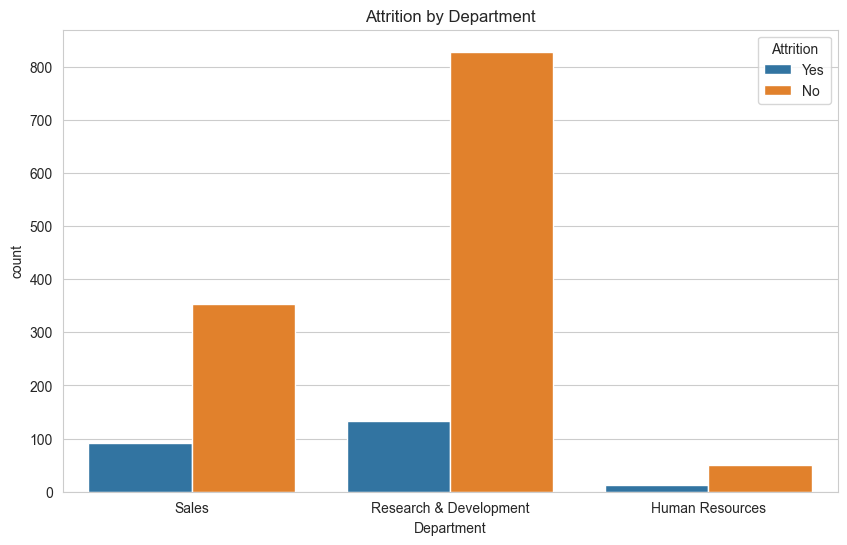

In [10]:
# Attrition by Department
sns.countplot(x='Department',hue='Attrition',data=df)
plt.title('Attrition by Department')
plt.show()

### Key Insight
- R&D and sales department experience the highest rate of turnover
- HR can focus retention strategies here


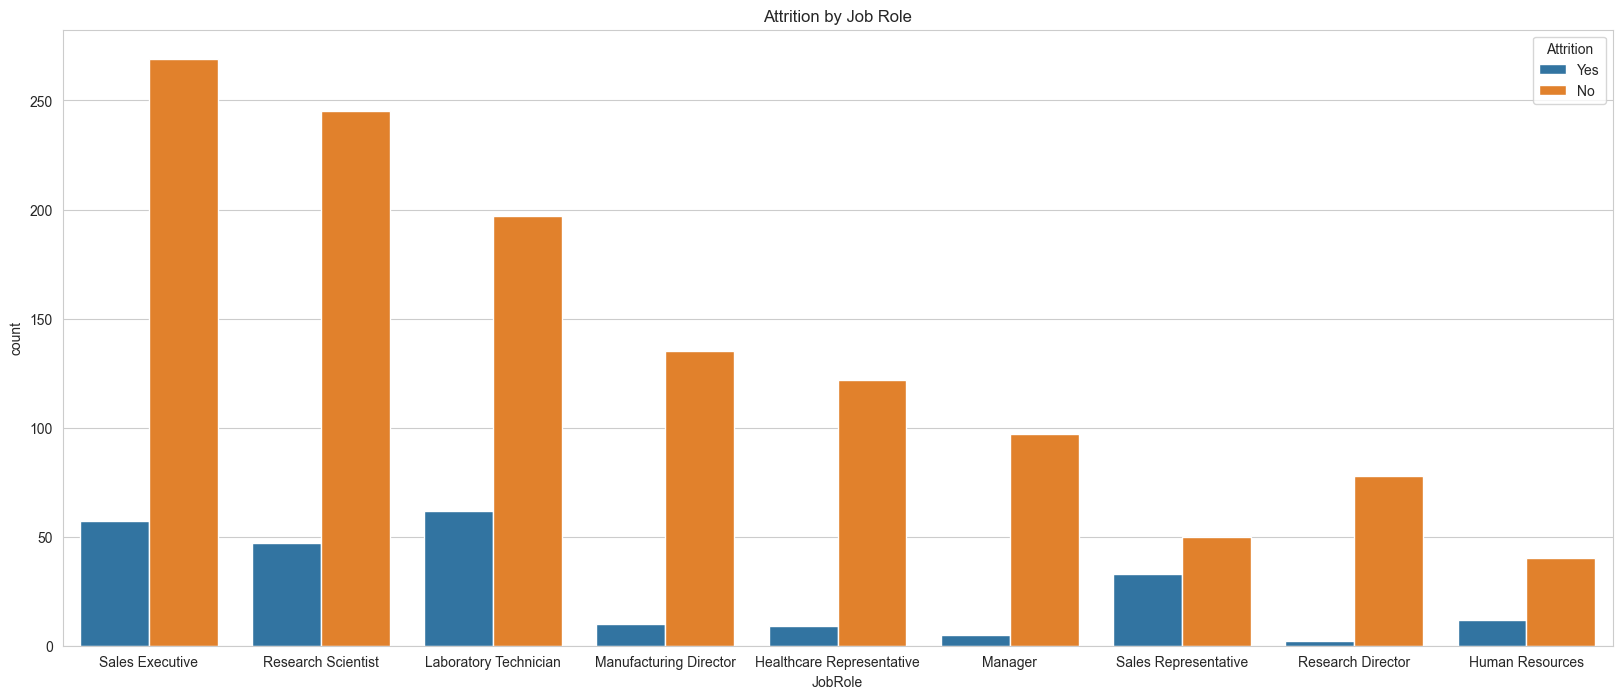

In [14]:
#Attrition by Job role
plt.figure(figsize=(20,8))
sns.countplot(x='JobRole',hue='Attrition',data=df)
plt.title('Attrition by Job Role')
plt.show()


### Key Insight
- Laboratory Technicians,Sales Executive and Research scientists experience the highest turnovers among the different job roles

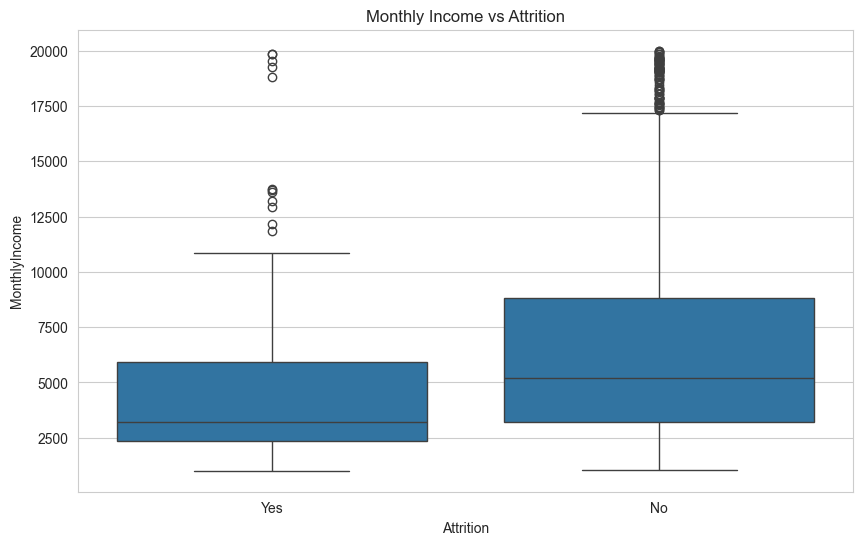

In [15]:
# Salary and Benefits Analysis
#Monthly income vs attrition

sns.boxplot(x='Attrition',y='MonthlyIncome',data=df)
plt.title('Monthly Income vs Attrition')
plt.show()


### Key Insight
- Lower income employees are more likely to leave

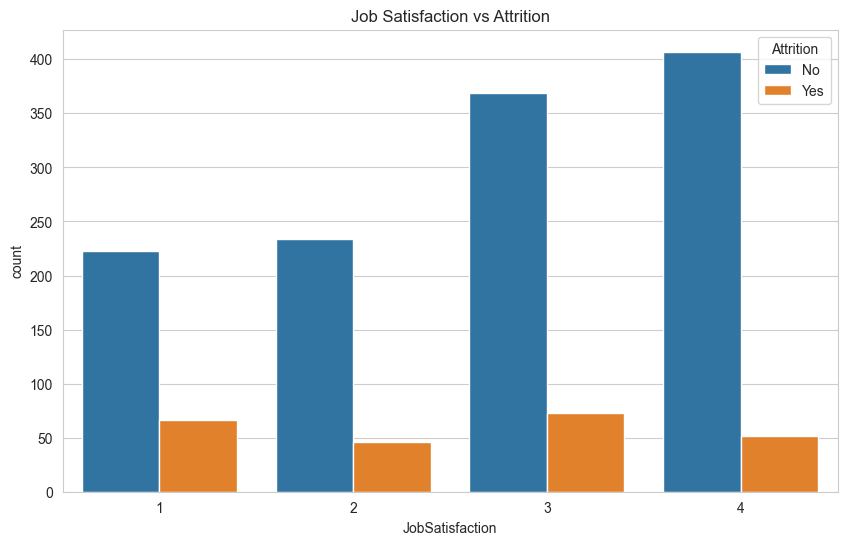

In [17]:
#Job Satisfaction vs Attrition
sns.countplot(x='JobSatisfaction',hue='Attrition',data=df)
plt.title('Job Satisfaction vs Attrition')
plt.show()


### Key Insight
- Surprisingly Employees with a job satisfaction rating of 3 have the highest turnover followed by the lowest rating

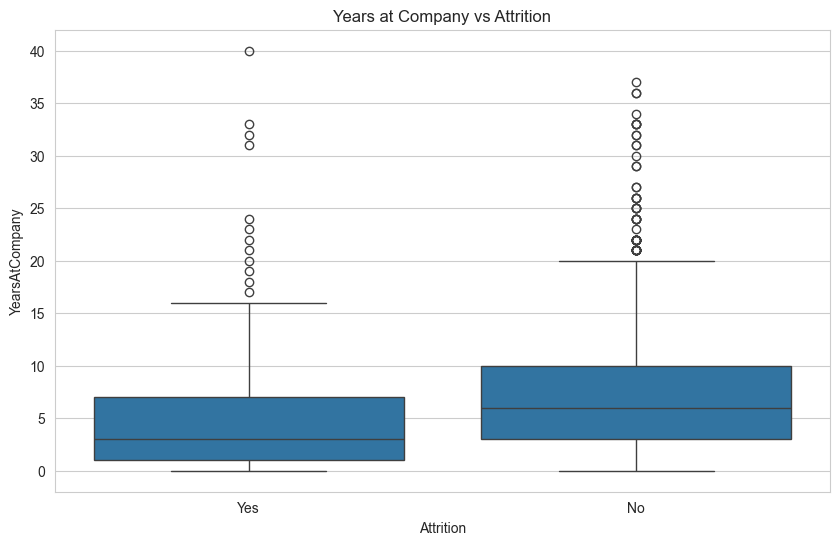

In [18]:
# Experience and Tenure Analysis
# Years at company vs attrition
sns.boxplot(x='Attrition',y='YearsAtCompany',data=df)
plt.title('Years at Company vs Attrition')
plt.show()


### Key insight
- Employees with fewer years at company tend to leave more


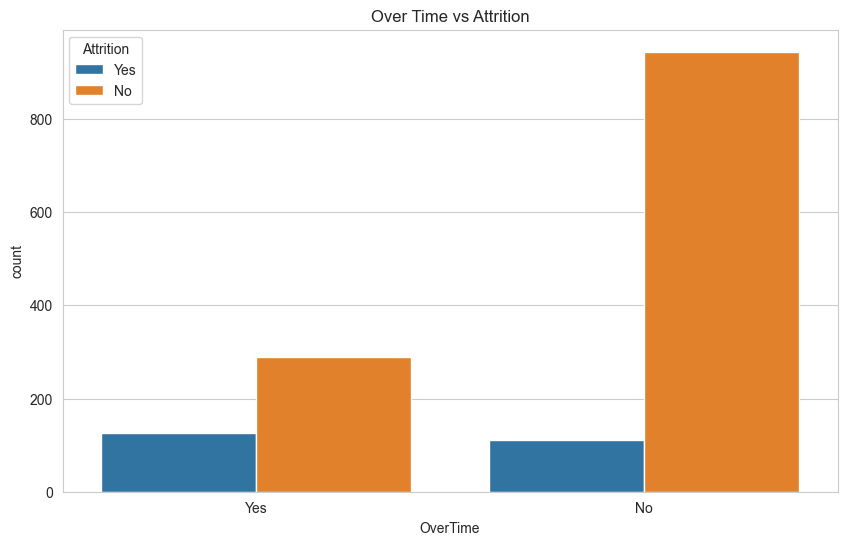

In [19]:
#Over time Effect
sns.countplot(x='OverTime',hue='Attrition',data=df)
plt.title('Over Time vs Attrition')
plt.show()

### Key Insight
- Overtime has a strong relationship with attrition
- However with this dataset there is not much of a difference with employees who don't do overtime and leave

In [20]:
# Correlation Analysis
# Encode Target Variable
df['AttritionFlag'] = df['Attrition'].map({'Yes': 1, 'No': 0})

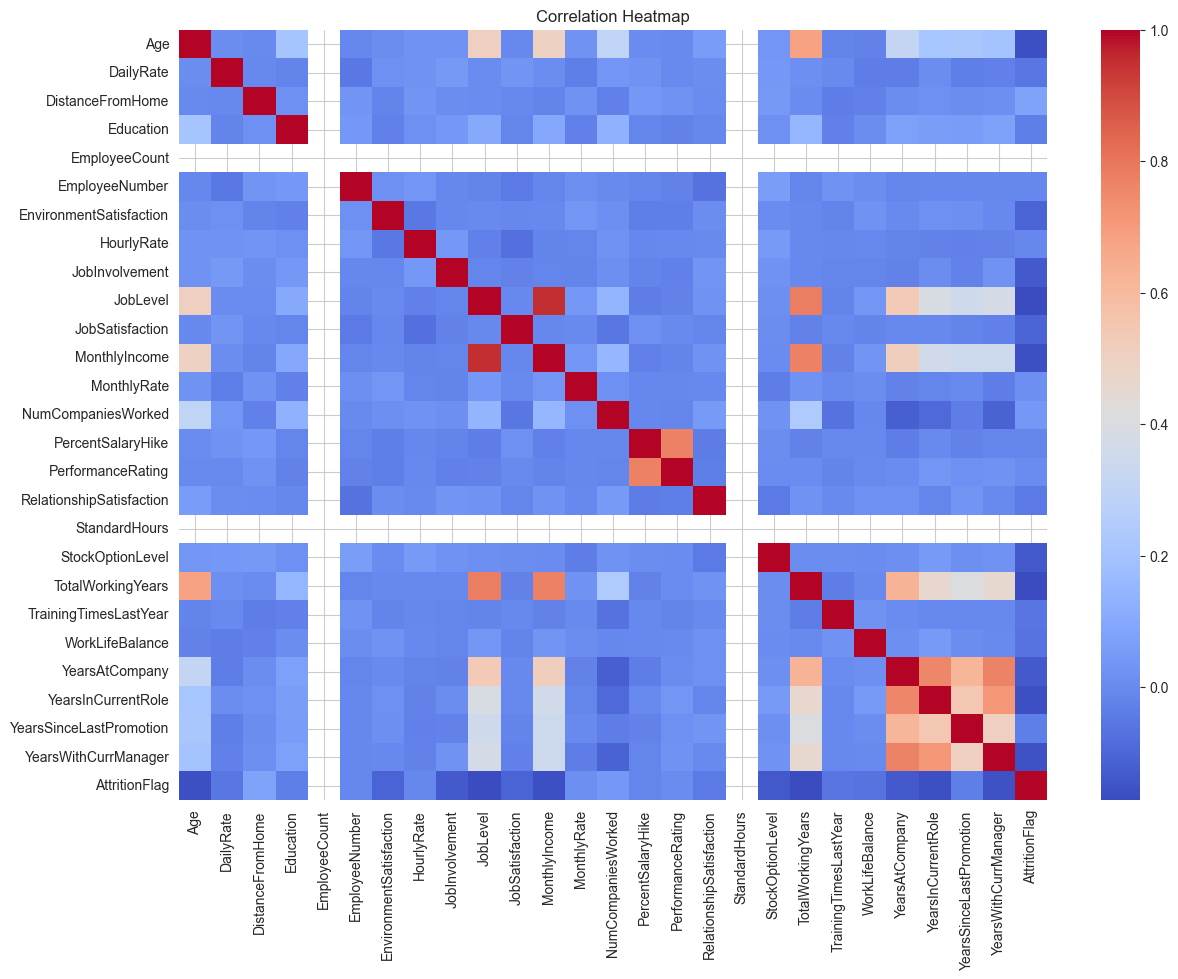

In [21]:
#Correlation Heatmap
plt.figure(figsize=(14,10))
corr= df.select_dtypes(include=np.number).corr()
sns.heatmap(corr,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Key Business Insights

### 1. Attrition Overview
- 16% overall attrition rate  
- Class imbalance present

### 2. Major Drivers of Attrition

Employees more likely to leave when they:

- Have **low monthly income**
- Work **overtime**
- Have **low job satisfaction**
- Are early in their career (few years at company)
- Are in specific departments like Sales

### 3. Risk Profiles

High-risk employee profile:

- Low salary  
- Frequent overtime  
- Low job satisfaction  
- Junior employees  
- Certain job roles (e.g Sales Representatives)

---

### Business Recommendations

HR should:

- Re-evaluate overtime policies  
- Improve compensation for high-risk roles  
- Focus retention efforts on new employees  
- Provide better career growth plans  
- Improve workplace satisfaction programs
